# E-COMMERCE CUSTOMER SEGMENTATION

#IMPORTING MODULE

In [ ]:
pip install simple-colors==0.1.0

In [ ]:
pip install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from simple_colors import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

#Using pandas to read the data from different format
#Here I have data in Excel (.xlsx) format

In [ ]:
customer=pd.read_excel('cust_data.xlsx')
customer_analysis=customer.copy()
customer_analysis.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


#Some of Categorical features in data so,we have to look into while feature selection

In [6]:
customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

#To check *null* and *Nan* values

In [7]:
customer_analysis.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [8]:
customer_analysis['Gender']=customer_analysis['Gender'].fillna('Unknown')

In [9]:
customer_analysis['Gender'].unique()

array(['M', 'F', 'Unknown'], dtype=object)

In [10]:
customer_analysis.Gender.value_counts()

Gender
F          22054
M           5222
Unknown     2724
Name: count, dtype: int64

#NUMBER OF CUSTOMERS

#To see the Gender percentage who made dominatation of Online Purchasing

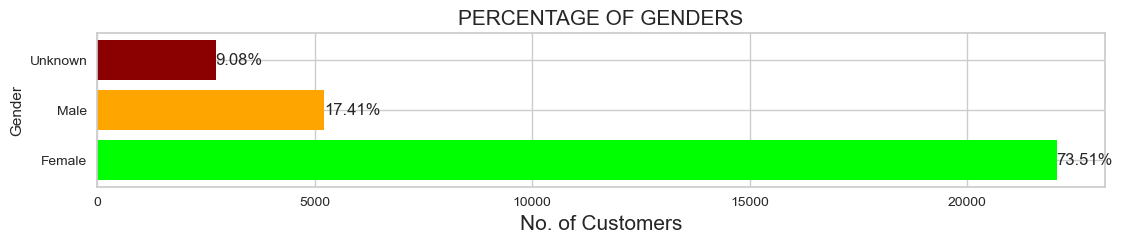

In [11]:
#==============================To find the percentage by gender=======================================================================
gender_counts = customer_analysis.Gender.value_counts()
plt.figure(figsize=(13, 2))  # Adjust the figure size as needed
color = ['lime', 'orange', 'darkred']
plt.barh(['Female', 'Male', 'Unknown'], gender_counts,color=color)
plt.title('PERCENTAGE OF GENDERS', fontsize=15)
plt.xlabel('No. of Customers', fontsize=15)
plt.ylabel('Gender')

percentage = gender_counts * 100 / len(customer_analysis.Gender)
# Add text  for the percentage values
for i, count in enumerate(gender_counts):
    plt.text(count + 1, i, f'{percentage[i]:.2f}%', va='center')  #va=text of percentage
plt.show()

#NUMBER OF ORDERS PLACED BY CUSTOMER

#To find the average and number of orders placed by Male and Female customers


In [12]:
new_m= customer_analysis.loc[(customer_analysis['Gender'] == 'M')]
max_m=new_m['Orders'].value_counts().sort_index(ascending=True)
no_order=max_m.iloc[0]
avg_order=int(max_m.mean())
max_order=max_m.iloc[-1]

order_male=no_order,avg_order,max_order

new_f= customer_analysis.loc[(customer_analysis['Gender'] == 'F')]
max_f=new_f['Orders'].value_counts().sort_index(ascending=True)
no_order0=max_f.iloc[0]
avg_order0=int(max_f.mean())
max_order0=max_f.iloc[-1]

order_female=no_order0,avg_order0,max_order0

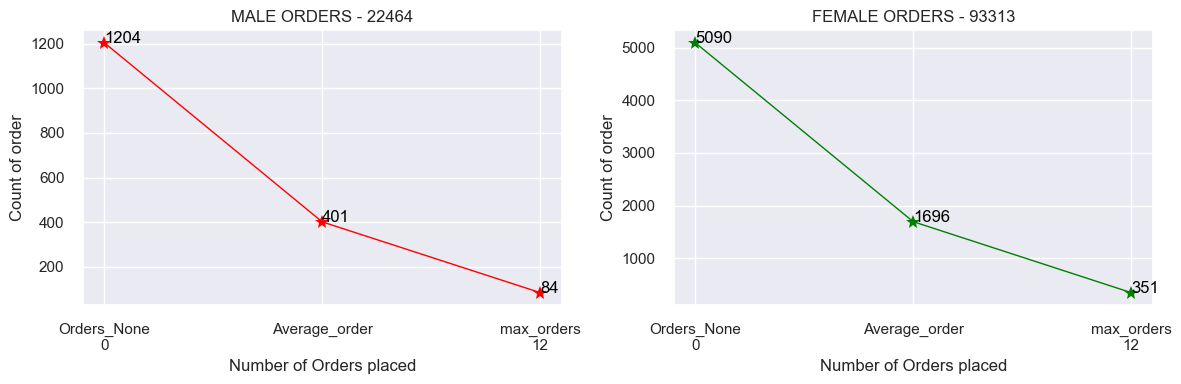


TOTAL NUMBER OF ORDERS PLACED BY CUSTOMERS :

Female Order  : 93313
Male Order    : 22464
Unknown Order : 9317
Total Order   : 125094

UNKNOWN ORDERS :  9317 we have to looking deep into unknown orders will increase the product recommendation with


In [13]:
#==============number of orders placed by male and female=================================================================

new_m= customer_analysis.loc[(customer_analysis['Gender'] == 'M')]    #male
max_m=new_m['Orders'].sum()
new_f= customer_analysis.loc[(customer_analysis['Gender'] == 'F')]    #female
max_f=new_f['Orders'].sum()
new_u= customer_analysis.loc[(customer_analysis['Gender'] == 'Unknown')] #unknown
max_u=new_u['Orders'].sum()

sns.set(style="darkgrid") 
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot 1 - Male customer
axes[0].plot(['Orders_None\n0', 'Average_order', 'max_orders\n12'], order_male, marker='*', linewidth=1, markersize=10, color='red')
axes[0].set_title(f'MALE ORDERS - {max_m}')
axes[0].set_xlabel('Number of Orders placed')
axes[0].set_ylabel('Count of order')
for i, count in enumerate(order_male):
    axes[0].text(i, count, str(count), va='baseline', color='black')

# Plot 2 -Female Customer
axes[1].plot(['Orders_None\n0', 'Average_order', 'max_orders\n12'], order_female, marker='*', linewidth=1, markersize=10, color='green')
axes[1].set_title(f'FEMALE ORDERS - {max_f}')
axes[1].set_xlabel('Number of Orders placed')
axes[1].set_ylabel('Count of order')
for i, count in enumerate(order_female):
    axes[1].text(i, count, str(count), va='baseline', color='black')
plt.tight_layout()  # auto adjust between subplots
plt.show() 

print('\nTOTAL NUMBER OF ORDERS PLACED BY CUSTOMERS :')
print('\nFemale Order  :',max_f)
print('Male Order    :',max_m)
print('Unknown Order :',max_u)
print('Total Order   :',(max_f+max_m+max_u))
print('\nUNKNOWN ORDERS : ',max_u,"we have to looking deep into unknown orders will increase the product recommendation with")

#TOP ORDER PLACED BY CUSTOMER ID NUMBER

In [14]:
top_cust=customer.copy()
top_cust['order_count']= top_cust.iloc[:,3:].sum(axis=1)
top_cust_id=top_cust.sort_values('order_count',ascending=False).head(10)

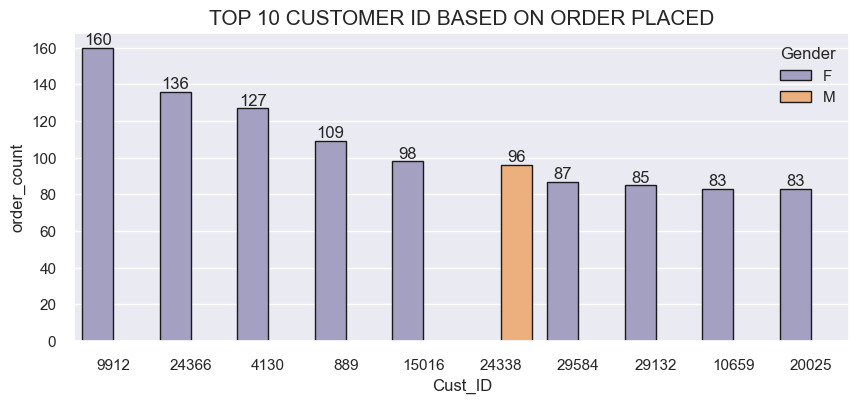

In [15]:
plt.figure(figsize=(10,4))
plt.title("TOP 10 CUSTOMER ID BASED ON ORDER PLACED",fontsize=15)
axes=sns.barplot(x='Cust_ID',
            y="order_count", data=top_cust_id,
            hue='Gender',linewidth=1,edgecolor=".1",palette='tab20c_r',
            order=top_cust_id.sort_values('order_count',ascending = False).Cust_ID)
for i in axes.containers:
    axes.bar_label(i)

Customer ID number 9912 placed maximum order
Among the top 10 oreder one male hold the 6th position
There is some similarity between customer ID number 10659 and 20023 Both are placed 83 order
FEMALE IS DOMINATING THE PRODUCT PURCHASING OVER PERIOD OF TIME FOCUSING MORE ON MALE CUSTOMERS 
IN UPCOMING PRODUCT RECOMMENDATION

#OVERALL ORDERS PLACED FROM 0 TO 12

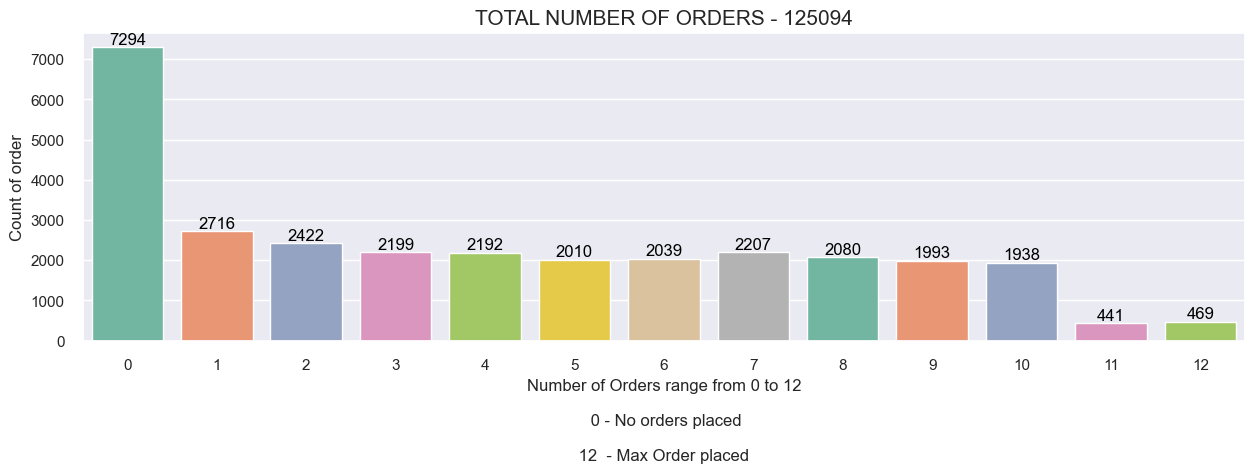

In [16]:
#=============================Overall oders place based on dicreate values 0 to 12=========================================
total_o=customer_analysis['Orders'].sum()

plt.figure(figsize=(15,4))
sns.countplot(x=customer_analysis['Orders'],palette = "Set2",)
plt.title(f'TOTAL NUMBER OF ORDERS - {total_o}',fontsize=15)
plt.xlabel('Number of Orders range from 0 to 12\n\n 0 - No orders placed\n\n 12  - Max Order placed ')
plt.ylabel('Count of order')

o_count=customer_analysis.Orders.value_counts().sort_index(ascending=True)
for i, count in enumerate(o_count):
    plt.text(i, count, str(count), va='bottom',ha='center', color='black')
plt.show()

# DATA PREPROCESSING

# HANDLING MISSING VALUES

In [17]:
missing=customer.copy()

#Creating Heatmap for visualize the missing values

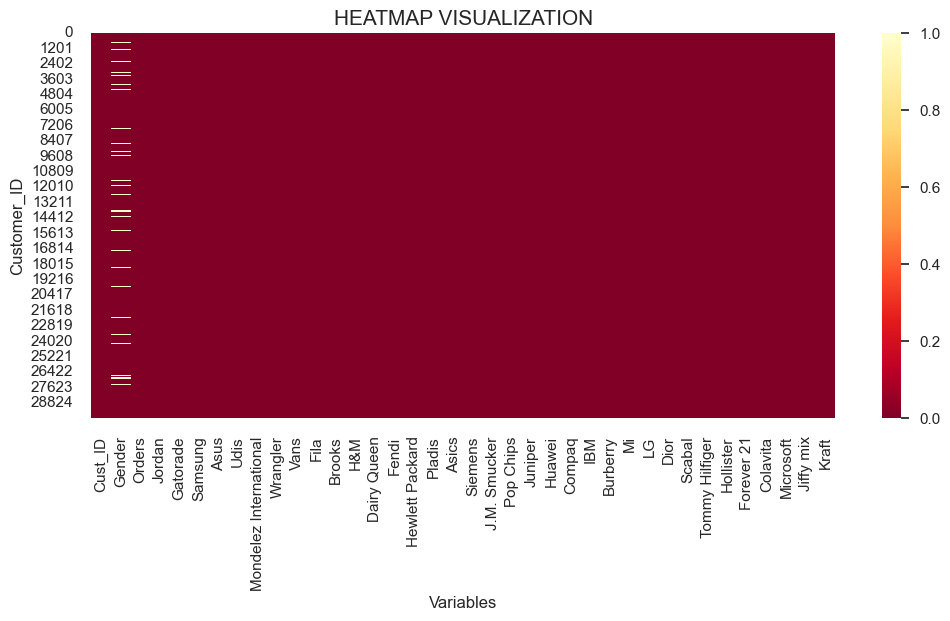

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(data=missing.isnull(),cmap='YlOrRd_r')
plt.title('HEATMAP VISUALIZATION', fontsize = 15)
plt.xlabel('Variables')
plt.ylabel('Customer_ID')
plt.show()

#Here we can see that in Customer ID number contain maximum missing of values it leads to affect result and it will be biased

In [19]:
missing.isna().sum().sum()

2724

#ENCODING CATEGORICAL VARIABLES

In gender column we have categorical features
Using One hot encoding it will fill categorical features into binary 0 and 1

In [20]:
missing_data= pd.get_dummies(missing,columns=['Gender'])    
data=missing_data.set_index('Cust_ID')

In [21]:
data.isna().sum().sum()

0

# DATA CLEANING

In [22]:
feature_select=data.drop(columns=['Gender_M','Gender_F'],axis=1)

#STATISTICAL SUMMARY

In [23]:
feature_select.describe(exclude=object,percentiles=[.75,.90]).T

,count,mean,std,min,50%,75%,90%,max
Orders,30000.0,4.169800,3.590311,0.0,4.0,7.0,9.0,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.0,0.0,1.0,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.0,0.0,1.0,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.0,0.0,1.0,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.0,0.0,0.0,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.0,0.0,0.0,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.0,0.0,1.0,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.0,0.0,0.0,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.0,0.0,0.0,16.0
Fila,30000.0,0.094267,0.531592,0.0,0.0,0.0,0.0,15.0


#CORRELATION BETWEEN THE VARIABLES

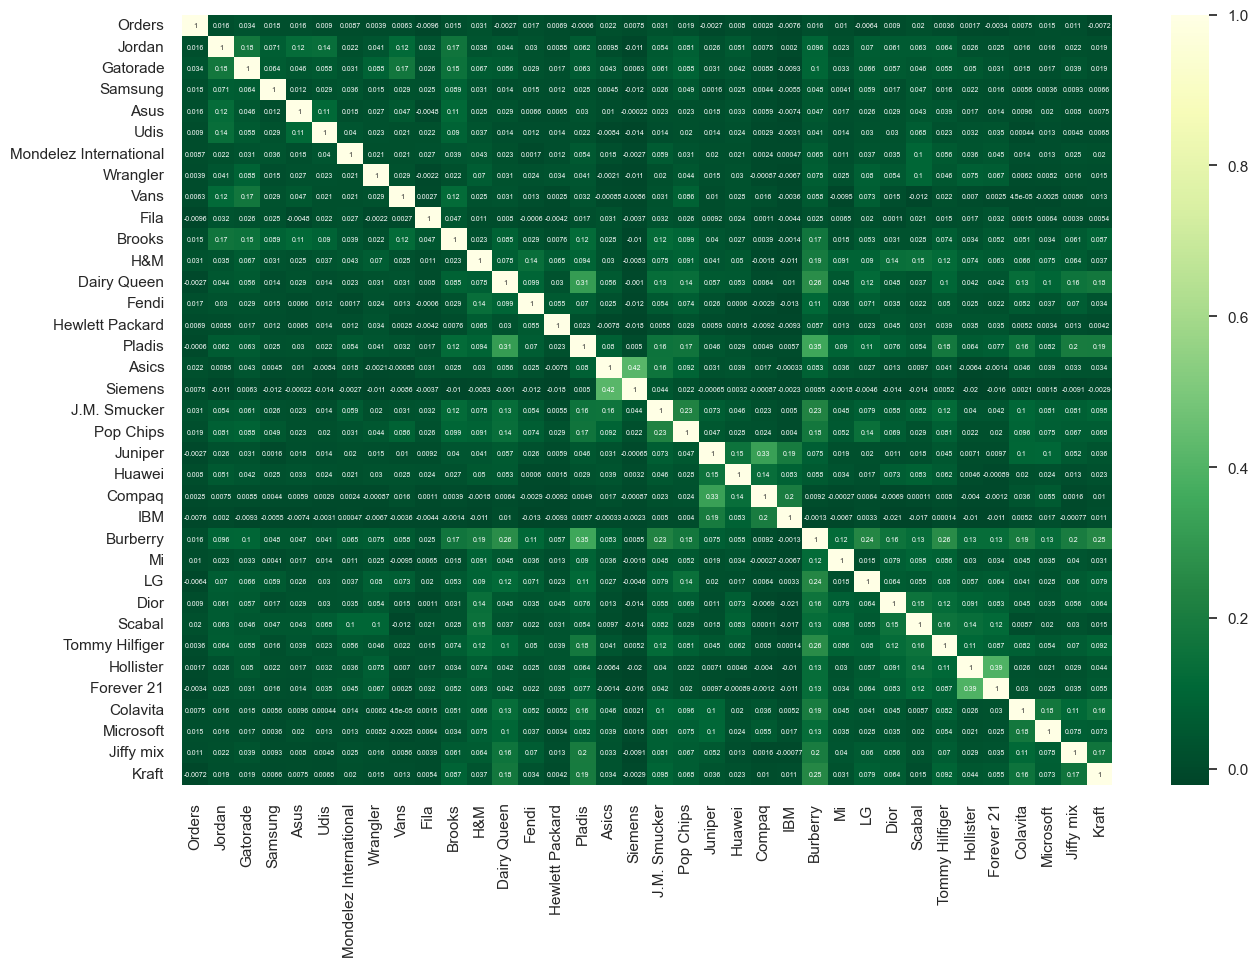

In [24]:
plt.figure(figsize=(15, 10))
corr_=sns.heatmap(feature_select.corr(), cmap="YlGn_r", annot=True,annot_kws={'size':5})
plt.show()

# FEATURE SELECTION

#FINDING OUT THE OUTLIERS USING BOXPLOT

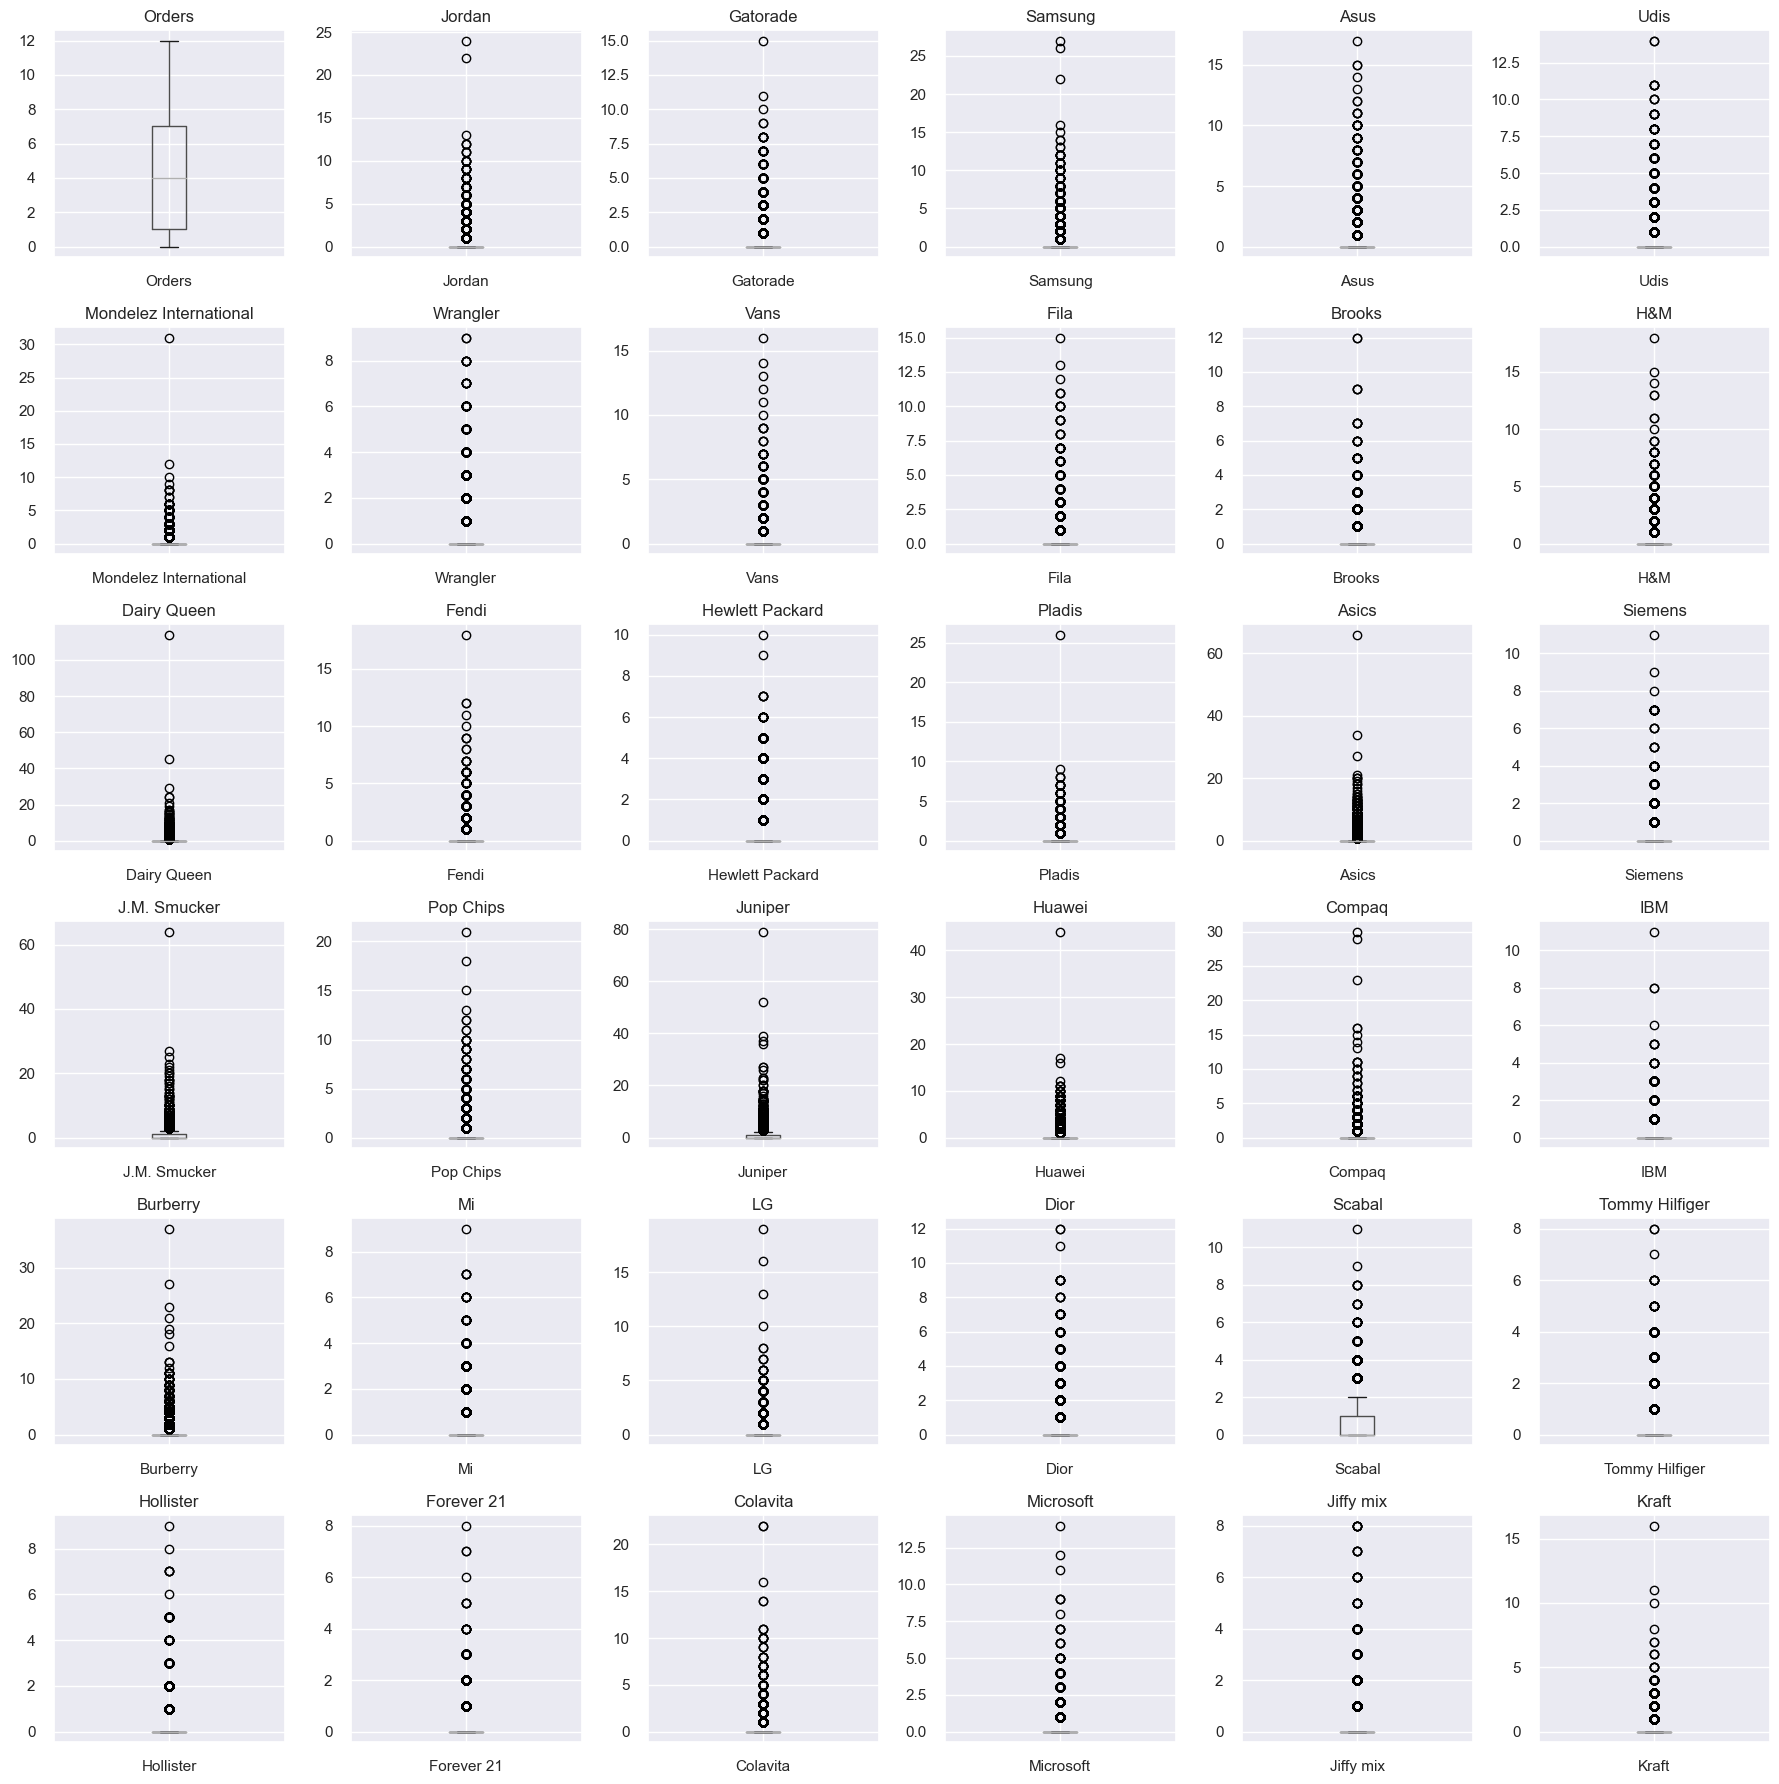

In [25]:
columns_to_plot = feature_select.columns[:36]

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 6, i % 6]  # Get the appropriate axis for the subplot
    feature_select.boxplot(column=column, ax=ax)  
    ax.set_title(column)  
plt.tight_layout() 
plt.show()

We have find that data contain Outliers
In E-commerce industry usually product purchased by customer during their Leisure time or wait for festive offers and discounts so it may affect the frequency of searching
For analysing the E-commerce data its better features containing outliers


# TO FIND PURCHASE PATTERN USE BRAND SEARCH ANALYSIS

In [26]:
brand_analysis=data.iloc[:,1:36]
brand_analysis.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# K-MEANS CLUSTERING AND SILHOUTTE SCORE

#USING SILHOUTTE SCORE AND VISUALIZER FIND OUT OPTIMAL NUMBER OF CLUSTERS(K)

Silhoutte score
For Optimal number 2, the average silhouette score is 0.4258849257911055
For Optimal number 3, the average silhouette score is 0.4140885046513313
For Optimal number 4, the average silhouette score is 0.36609115227038336
For Optimal number 5, the average silhouette score is 0.19764677527211016

Optimal number of clusters(k) : 2 with highest silhoutte score


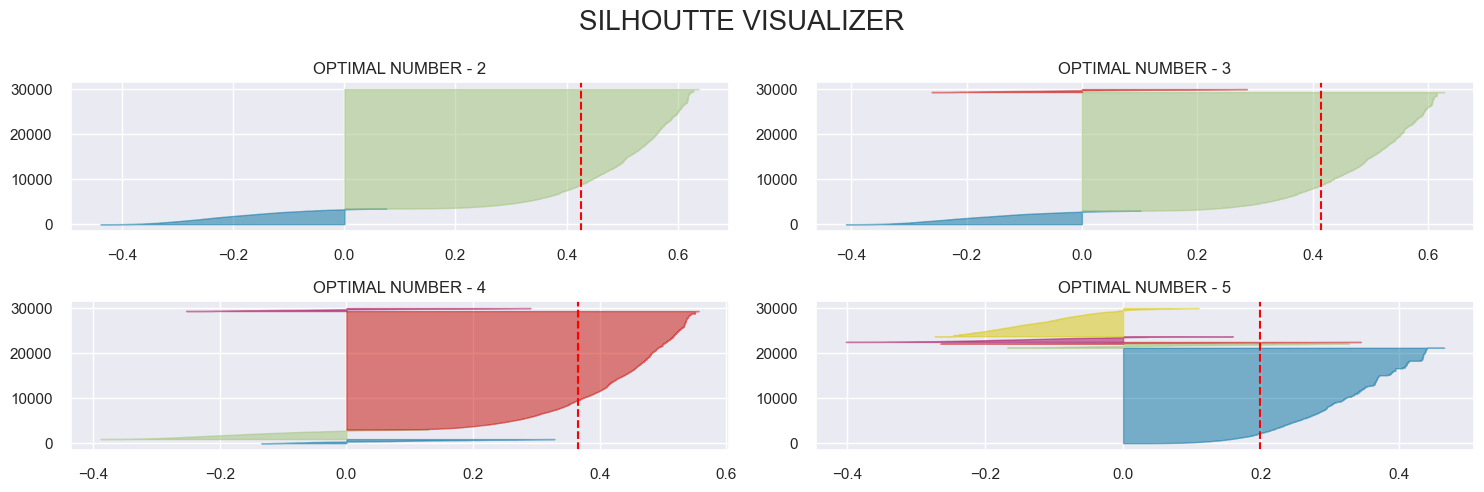

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
silhouette_scores = []
random_k = [2,3,4, 5]
print('Silhoutte score')
for i in random_k:
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=50,n_init=10)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(brand_analysis)
    
    cluster_labels = kmeans.fit_predict(brand_analysis)
    score = silhouette_score(brand_analysis, cluster_labels,random_state=50)
    silhouette_scores.append(score)
    print(f'For Optimal number {i}, the average silhouette score is {score}')
    ax[q-1][mod].set_title(f'OPTIMAL NUMBER - {i}')
    
optimal_clusters = random_k[np.argmax(silhouette_scores)]
print(f'\nOptimal number of clusters(k) : {optimal_clusters} with highest silhoutte score')
plt.suptitle("SILHOUTTE VISUALIZER",fontsize=20)
plt.tight_layout()
plt.show()


#PLOTTING OPTIMAL CLUSTER NUMBERS

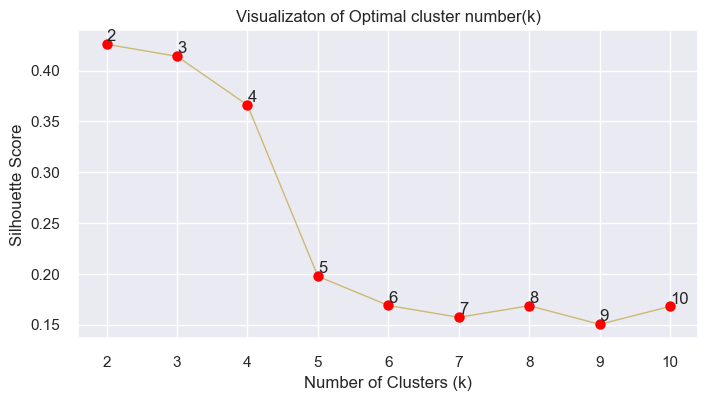

In [28]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=50,n_init=10)
    kmeans.fit_predict(brand_analysis)
    labels = kmeans.labels_
    score = silhouette_score(brand_analysis, labels,random_state=50)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8,4))
plt.plot(k_values, silhouette_scores, 'y.-',markersize=15,linewidth=1,markerfacecolor='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Visualizaton of Optimal cluster number(k)')
for i, k in enumerate(k_values):
    plt.text(k, silhouette_scores[i], str(k), ha='left', va='bottom')
plt.show()


#OPTIMAL CLUSTER NUMBER REPORT FOR BRAND SEARCH ANALYSIS

#Here we can see that in optimal values 2 has more uniform thickness when compared to remaining values thickness level differed

#Choosing *Optimal vlaue 2* is better option for clustering the brands eventhough the sillhoutte score is below average to one


#SELECTING CLUSTER FOR ANALYSIS

#Fit the model into data and copy of exact data using deep function

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,random_state=50,n_init=10)
model.fit(brand_analysis)

KMeans(n_clusters=2, n_init=10, random_state=50)

In [30]:
cluster_analysis = brand_analysis.copy(deep=True)
cluster_analysis['cluster'] =model.labels_ 
cluster_analysis.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


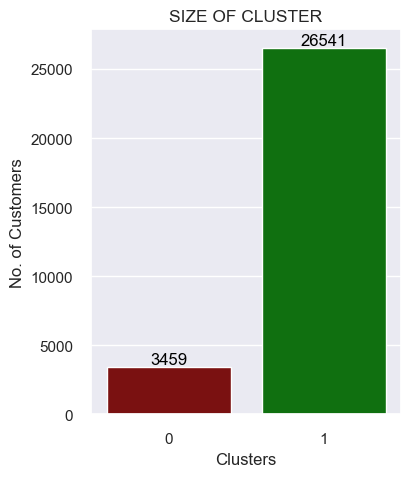

In [31]:
plt.figure(figsize=(4,5))
sns.countplot(data= cluster_analysis, x = 'cluster', palette=['darkred',"green"])
plt.title('SIZE OF CLUSTER', fontsize = 12.5)
plt.xlabel('Clusters')
plt.ylabel('No. of Customers')
cluster=cluster_analysis.cluster.value_counts().sort_index(ascending=True)
for i, count in enumerate(cluster):
    plt.text(i, count, str(count), va='bottom',ha='center', color='black')

#FEATURE MODIFICATION

In [ ]:
cluster_analysis.rename(columns={'cluster': 'Brand'},inplace=True) 
#grouping the data
analyse_brands=cluster_analysis.groupby('Brand').sum().T 
#sorting the brands 0
brand_sort_0=analyse_brands.iloc[:,0:1].sort_values(0,ascending=False).head(10)
brand_sort_1=analyse_brands.iloc[:,1:].sort_values(1,ascending=False).head(10)

#VISUALIZING TOP SEARCHED BRANDS BASED ON CLUSTERING

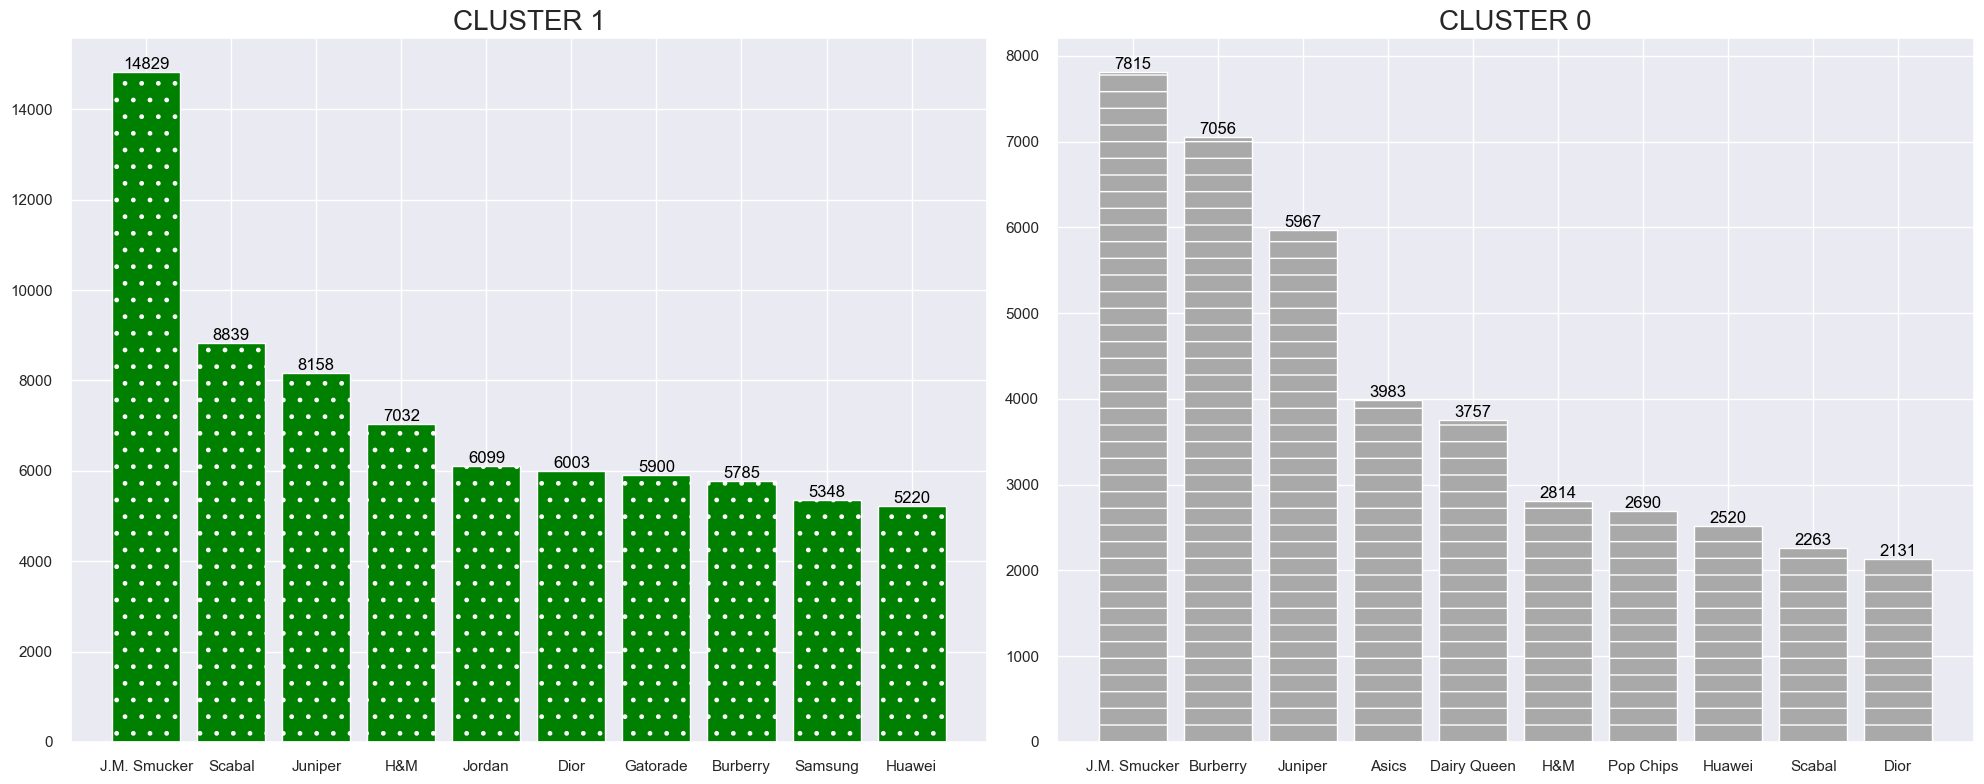

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))

axes[0].bar(brand_sort_1.index, brand_sort_1.values.flatten(), color='green',hatch='.')  #cluster 1
axes[0].set_title('CLUSTER 1',fontsize=20)
for i, count in enumerate(brand_sort_1.values.flatten()):
    axes[0].text(i, count, str(count), va='bottom', ha='center', color='black')

axes[1].bar(brand_sort_0.index, brand_sort_0.values.flatten(), color='darkgrey',hatch='-')   #cluster 0
axes[1].set_title('CLUSTER 0',fontsize=20)
for i, count in enumerate(brand_sort_0.values.flatten()):
    axes[1].text(i, count, str(count), va='bottom', ha='center', color='black')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

CLUSTER REPORT

CLUSTER 1 

We can use cluster 1 for brand search analysis which hold highest brand searches around 26437 customers
MOST AND LEAST SEARCHED BRAND BY CUSTOMER

    Most frequent searched brand by customer is J.M. Smucker Customer are likely to search *food* related brands
    Least frequent searched brand by customer is IBM


HERE I LISTED SOME OF THE BRANDS HOLD THE TOP CUSTOMER BASE
TYPE OF INDUSTRY 	BRANDS
Food and Drink 	*J.M. Smucker* , *Gatorade*
Fashion brands 	*Scabal, H&M, Dior, Burberry*
Technology and Networking 	*Juniper*
Mobile brands 	*Samsung* and *Huawei*
Sports brands 	*Jordan*

    CLUSTER 1 - BRANDS MOSTLY ENGAGED BY CUSTOMERS WHILE BRAND SEARCHING AND AN INFLUENCE OF PREVILAGE TO MODERATE CUSTOMER FOR PLACING ORDERS

        OVERALL CONCLUSION FOR CLUSTER 1 IS CUSTOMER LIKELY TO SEARCH FOOD , CLOTHING , MOBILES AND SPORTWEARS BRANDS



CLUSTER 0 

We can see that cluster 0 hold low-set brand searches around 3563 customers

    CLUSTER 0 - INEXPENSIVE BRANDS AND THIS LEADS TO LESS INFULENCE OF PREVILAGE CUSTOMER WHILE SEARCHING OF BRANDS

        BY ADDING FESTIVE OFFERS AND REASONABLE DISCOUNTS IT LEADS TO FASCINATE ABOUT THE BRANDS WHILE CUSTOMERS SEARCHING FOR A PRODUCTS

            OVERALL CONCLUSION FOR CLUSTER 0 IS IT WILL ATTRACT LESS NUMBER OF CUSTOMERS

CONCLUSION:

In E-commerce customer segmentation the k-Means clustering plays major role for identifying the purchase pattern based on customer interest ,Here I used silhoutte score for finding an optimal cluster number to predict the right n_cluster.

After that splitting cluster into cluster 1 is previlge to moderate customer and cluster 0 is low-set of interest in purchasing


